# Image segmentation 
## Author: Jiwon Kim
### Task: Portrait Image 

In [3]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

In [19]:
class SemanticSegmentation:
    def __init__(self, model_file):
        """
        Create a pixellib segmentation model object. 
        Use Pascalvoc model with 21 labels. 
        Input:
        - model_file: String. File path
        Output:
        - Initilized model with seg_color tuple to convert the orders 
        """
        self.model = semantic_segmentation()
        self.model.load_pascalvoc_model(model_file)
        self.label_names = [
            'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
            'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
            'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
        ]
        self.seg_color = (128, 128, 192)
        self.segmented_labels = []

    def segment(self, image_path):
        labels = []
        segvalues, output = self.model.segmentAsPascalvoc(image_path)
        for class_id in segvalues['class_ids']:
            labels.append(self.label_names[class_id])
        print(f'There are {labels} segmented. Total labels: {len(labels)}')
        seg_map = np.all(output == self.seg_color, axis=-1)
        return seg_map

    def visualize_mask(self, image_path):
        seg_map = self.segment(image_path)
        plt.imshow(seg_map, cmap='gray')
        plt.show()

In [11]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

if not os.path.isfile(model_file): 
    print('File does not exist') #Above if syntax checks if the file does not exist
    model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 
    urllib.request.urlretrieve(model_url, model_file) # download using urllib.request.urlretrieve

In [12]:
img_path= os.getenv('HOME')+'/aiffel/human_segmentation/images/'

In [13]:
os.listdir(img_path)

['my_image.png',
 'chaewon_christmas.jpeg',
 'sakura_selca.jpeg',
 'eunchae_lessarfimofficial.jpeg',
 'chaewon_vita.jpeg']

In [14]:
chaewon_christmas_path = os.path.join(img_path, 'chaewon_christmas.jpeg')

There are ['background', 'person']. Total labels: 2
There are ['background', 'person', 'background', 'person']. Total labels: 4


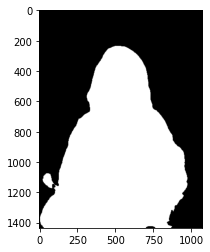

In [15]:
ss_model = SemanticSegmentation(model_file)
seg_map = ss_model.segment(chaewon_christmas_path)
ss_model.visualize_mask(chaewon_christmas_path)

In [22]:
chaewon_christmas = cv2.imread(chaewon_christmas_path)

In [23]:
def visualize_segmentation(img: np.array, seg_map):
    img_show = img.copy()
    img_mask = seg_map.astype(np.uint8) * 255
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()

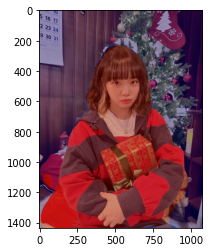

In [24]:
visualize_segmentation(img = chaewon_christmas, seg_map = seg_map)

In [28]:
def blur_image (img: np.array, blur_kernel: tuple):
    """
    Blur a given image (np.array) with the given blur_kernel
    Will visualize and also return the blurred image (np.array)
    Input:
    - img: np.array
    - blur_kernel = Size of blurring kernel (tuple)
    Output:
    - Blurred img: np.array
    - Visualize also
    """
    img_blur = cv2.blur(img, blur_kernel)
    plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
    plt.show()
    return(img_blur)

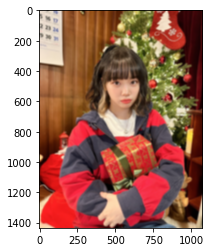

In [29]:
chaewon_blur = blur_image(chaewon_christmas, (13,13))

In [31]:
img_mask = seg_map.astype(np.uint8) * 255

In [60]:
def background(mask: np.array, img: np.array):
    """
    Create blurred background w/
    mask and image.
    """
    img_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask)
    img_bg = cv2.bitwise_and(img, img_bg_mask)
    plt.imshow(cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB))
    plt.show()
    return(img_bg)

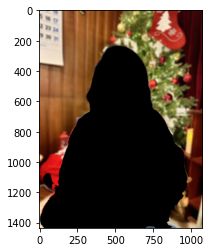

In [40]:
chaewon_blurred_background = background(img_mask, img = chaewon_blur)

In [65]:
def concat_images(mask, orig_img, background_img):
    """
    Concatenates mask, original image, and blurred background image.
    Input::
    - Mask: Wanted object mask is colored white (255)
    - Orig img: Original image in np.array
    - blur_img: Anything not masked will be blurred
    """
    img_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    img_concat = np.where(img_mask==255, orig_img, background_img)
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.show()
    return(img_concat)

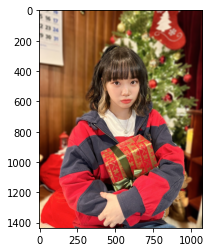

In [66]:
chaewon_final = concat_images(mask = img_mask, 
             orig_img = chaewon_christmas, 
             background_img = chaewon_blurred_background)

In [50]:
chaewon_final

array([[[201, 212, 226],
        [201, 212, 226],
        [201, 212, 226],
        ...,
        [ 14,  11,  65],
        [ 14,  11,  65],
        [ 14,  11,  65]],

       [[201, 212, 226],
        [201, 212, 226],
        [201, 212, 226],
        ...,
        [ 14,  12,  65],
        [ 14,  11,  65],
        [ 14,  11,  65]],

       [[201, 212, 226],
        [201, 212, 226],
        [201, 212, 226],
        ...,
        [ 14,  12,  65],
        [ 14,  11,  66],
        [ 14,  11,  66]],

       ...,

       [[168, 210, 245],
        [168, 210, 245],
        [168, 210, 245],
        ...,
        [114, 141, 152],
        [113, 139, 151],
        [112, 139, 150]],

       [[168, 210, 245],
        [168, 210, 245],
        [168, 210, 245],
        ...,
        [114, 141, 152],
        [113, 139, 150],
        [112, 139, 150]],

       [[168, 210, 245],
        [168, 210, 245],
        [168, 210, 245],
        ...,
        [114, 140, 152],
        [112, 139, 150],
        [112, 138, 150]]

In [51]:
img_path

'/aiffel/aiffel/human_segmentation/images/'

In [52]:
final_chaewon_path = os.path.join(img_path, 'chaewon_christmas_blurbackground.jpeg')

In [53]:
cv2.imwrite(final_chaewon_path, img = chaewon_final)

True

In [54]:
img_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Background into focus

In [81]:
img_mask_flipped = np.where(img_mask == 0, 255, 0).astype('uint8')

In [82]:
img_mask_flipped_color = cv2.cvtColor(img_mask_flipped, cv2.COLOR_GRAY2BGR)

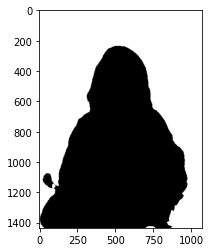

In [83]:
plt.imshow(img_mask_flipped_color)

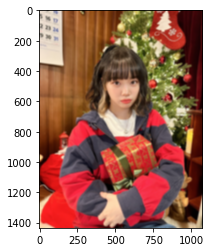

In [84]:
chaewon_blur = blur_image(chaewon_christmas, (13,13))

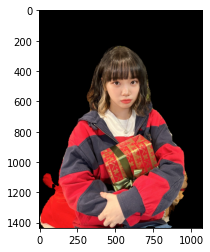

In [85]:
chaewon_only = background(mask = img_mask_flipped, 
          img = chaewon_christmas)

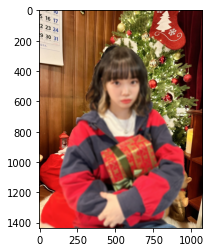

In [86]:
christmas_final = concat_images(mask = img_mask_flipped, 
             orig_img = chaewon_christmas, 
             background_img = chaewon_blur)

In [87]:
christmas_path = os.path.join(img_path, 'christmas_background.jpeg')
cv2.imwrite(christmas_path, img = christmas_final)

True

## Cat

In [88]:
img_path= os.getenv('HOME')+'/aiffel/human_segmentation/images/'
os.listdir(img_path)

['my_image.png',
 'chaewon_christmas.jpeg',
 'sakura_selca.jpeg',
 'eunchae_lessarfimofficial.jpeg',
 'chaewon_christmas_blurbackground.jpeg',
 'cat.jpeg',
 'chaewon_vita.jpeg',
 '.ipynb_checkpoints',
 'christmas_background.jpeg']

In [89]:
cat_path = os.path.join(img_path, 'cat.jpeg')
ss_model = SemanticSegmentation(model_file)
seg_map = ss_model.segment(cat_path)

There are ['background', 'cat', 'chair'] segmented. Total labels: 3


There are ['background', 'cat', 'chair'] segmented. Total labels: 3


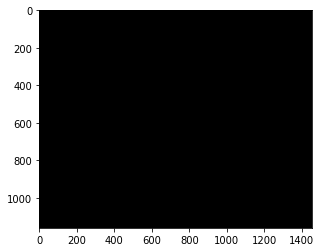

In [90]:
ss_model.visualize_mask(cat_path)

## 회고록 
- 백그라운드랑 인물을 서로 포커스 인을 하여 재미있는 사진을 만들었다
- 고양이 사진을 구해서 segmentation 해보았다. 레이블을 3가지 이상으로 잘 보여진것 같지만, mask를 성공적으로 만들어내지 못했다 
- 김채원과 백그라운드를 완벽하게 구분해내지 못했다 (i.e. 인형) 
- 생각할 점: 
    - 데이터의 다양성:: 레이블 당 데이터 수를 좀 더 늘리면 좋을것 같다 
    - Data Augmentation Method: Rotation, dimming light 등으로 데이터를 늘려보자
    - 모델 앙상블을 만들어 모델 성능을 올리자 

![image](../../human_segmentation/images/chaewon_christmas_blurbackground_comment.jpeg)